In [1]:
#Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)

print("Libraries loaded!")

Libraries loaded!


In [2]:

#Load Dataset

file_path = r"C:\Users\Adhithya Raviprakash\OneDrive\Documents\GitHub\Auto-Pulse\data\raw\nasa_cmaps\cmaps\train_FD001.txt"  # change if needed

df = pd.read_csv(file_path, sep=" ", header=None)

# Remove empty columns (CMAPSS has extra spaces)
df = df.dropna(axis=1)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [3]:

index_names = ['engine_id', 'cycle']

operational_settings = ['setting_1', 'setting_2', 'setting_3']

sensor_names = [
    'T2', 'T24', 'T30', 'T50',
    'P2', 'P15', 'P30',
    'Nf', 'Nc', 'epr', 'Ps30',
    'phi', 'NRf', 'NRc',
    'BPR', 'farB', 'htBleed',
    'Nf_dmd', 'PCNfR_dmd',
    'W31', 'W32'
]

col_names = index_names + operational_settings + sensor_names

# Assign new column names
df.columns = col_names

print("Columns renamed successfully!")
print(df.head())

Columns renamed successfully!
   engine_id  cycle  setting_1  setting_2  setting_3      T2     T24      T30  \
0          1      1    -0.0007    -0.0004      100.0  518.67  641.82  1589.70   
1          1      2     0.0019    -0.0003      100.0  518.67  642.15  1591.82   
2          1      3    -0.0043     0.0003      100.0  518.67  642.35  1587.99   
3          1      4     0.0007     0.0000      100.0  518.67  642.35  1582.79   
4          1      5    -0.0019    -0.0002      100.0  518.67  642.37  1582.85   

       T50     P2    P15     P30       Nf       Nc  epr   Ps30     phi  \
0  1400.60  14.62  21.61  554.36  2388.06  9046.19  1.3  47.47  521.66   
1  1403.14  14.62  21.61  553.75  2388.04  9044.07  1.3  47.49  522.28   
2  1404.20  14.62  21.61  554.26  2388.08  9052.94  1.3  47.27  522.42   
3  1401.87  14.62  21.61  554.45  2388.11  9049.48  1.3  47.13  522.86   
4  1406.22  14.62  21.61  554.00  2388.06  9055.15  1.3  47.28  522.19   

       NRf      NRc     BPR  farB  htB

In [4]:
#Basic Info
print("Shape:", df.shape)
df.info()
df.describe()

Shape: (20631, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   engine_id  20631 non-null  int64  
 1   cycle      20631 non-null  int64  
 2   setting_1  20631 non-null  float64
 3   setting_2  20631 non-null  float64
 4   setting_3  20631 non-null  float64
 5   T2         20631 non-null  float64
 6   T24        20631 non-null  float64
 7   T30        20631 non-null  float64
 8   T50        20631 non-null  float64
 9   P2         20631 non-null  float64
 10  P15        20631 non-null  float64
 11  P30        20631 non-null  float64
 12  Nf         20631 non-null  float64
 13  Nc         20631 non-null  float64
 14  epr        20631 non-null  float64
 15  Ps30       20631 non-null  float64
 16  phi        20631 non-null  float64
 17  NRf        20631 non-null  float64
 18  NRc        20631 non-null  float64
 19  BPR        20631 non-null  

,engine_id,cycle,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.3,47.541168,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,5.329200e-15,0.001389,0.885092,0.070985,22.082880,0.0,0.267087,0.737553,0.071919,19.076176,0.037505,3.469531e-18,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.3,46.850000,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.3,47.350000,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.3,47.510000,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.3,47.700000,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.3,48.530000,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [5]:
#No Of Engines

df['engine_id'].nunique()

print("Missing Values:", df.isnull().sum().sum())

Missing Values: 0


Mean Lifespan: 206.31
Min Lifespan: 128
Max Lifespan: 362


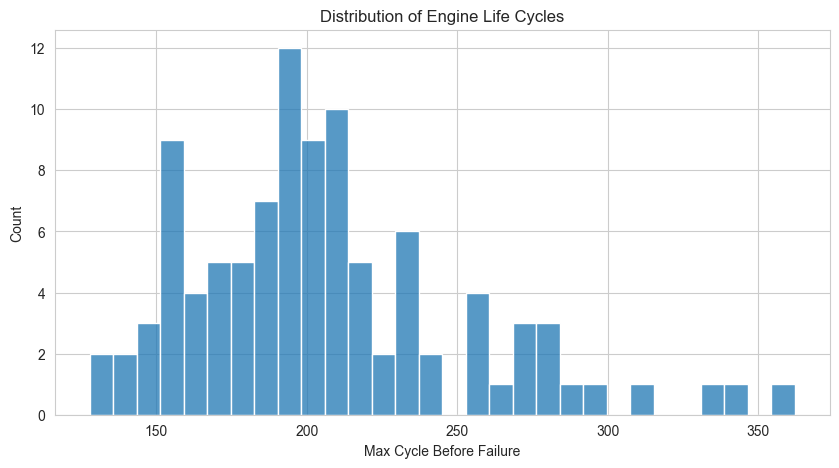

In [6]:
#Engine Life
engine_life = df.groupby('engine_id')['cycle'].max()

print("Mean Lifespan:", engine_life.mean())
print("Min Lifespan:", engine_life.min())
print("Max Lifespan:", engine_life.max())

plt.figure(figsize=(10,5))
sns.histplot(engine_life, bins=30)
plt.title("Distribution of Engine Life Cycles")
plt.xlabel("Max Cycle Before Failure")
plt.show()

In [7]:
#Create RUL

max_cycle = df.groupby('engine_id')['cycle'].max().reset_index()
max_cycle.columns = ['engine_id', 'max_cycle']

df = df.merge(max_cycle, on='engine_id')

df['RUL'] = df['max_cycle'] - df['cycle']

df.drop('max_cycle', axis=1, inplace=True)

df.head()



,engine_id,cycle,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


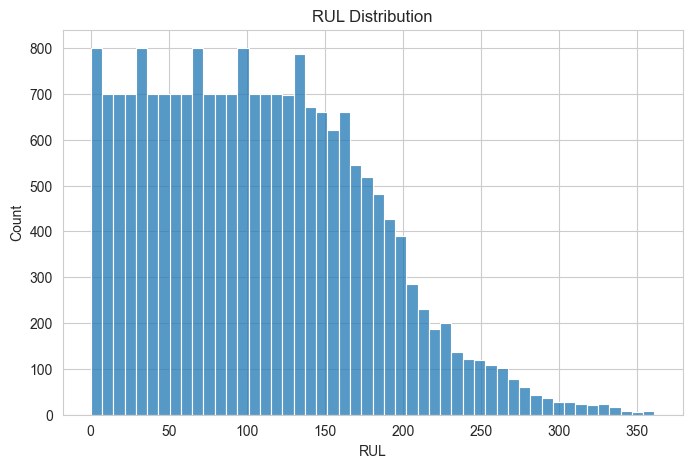

In [8]:
#RUL Distribution Before Clipping

plt.figure(figsize=(8,5))
sns.histplot(df['RUL'], bins=50)
plt.title("RUL Distribution")
plt.show()

In [9]:
# RUL Clipping
RUL_THRESHOLD = 125
df['RUL'] = df['RUL'].clip(upper=RUL_THRESHOLD)
print(f"RUL Clipping applied. Max RUL is now capped at {RUL_THRESHOLD} cycles.")
print("\nRUL Statistics after Clipping:")

df['RUL'].describe().T

RUL Clipping applied. Max RUL is now capped at 125 cycles.

RUL Statistics after Clipping:


count    20631.000000
mean        86.829286
std         41.673699
min          0.000000
25%         51.000000
50%        103.000000
75%        125.000000
max        125.000000
Name: RUL, dtype: float64

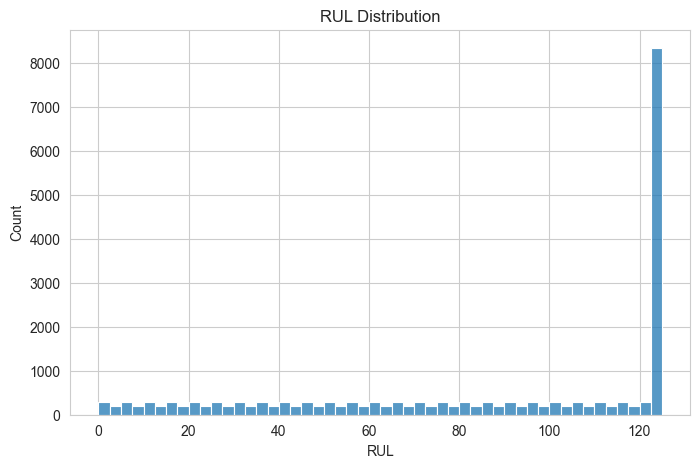

In [10]:
#RUL Distribution After Clipping

plt.figure(figsize=(8,5))
sns.histplot(df['RUL'], bins=50)
plt.title("RUL Distribution")
plt.show()

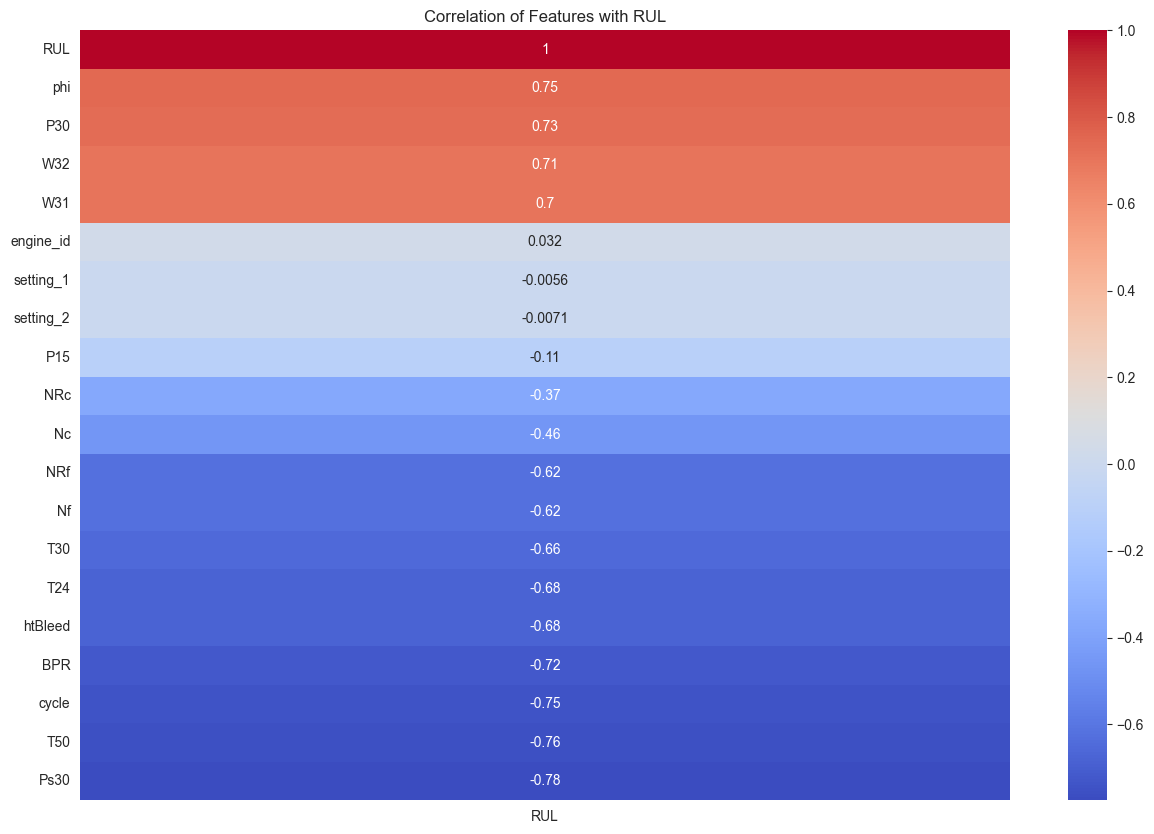

In [29]:
#Correlation HeatMap For Sensors + RUL

plt.figure(figsize=(15,10))

corr = df.corr()

sns.heatmap(corr[['RUL']].sort_values(by='RUL', ascending=False),
            annot=True,
            cmap='coolwarm')

plt.title("Correlation of Features with RUL")
plt.show()

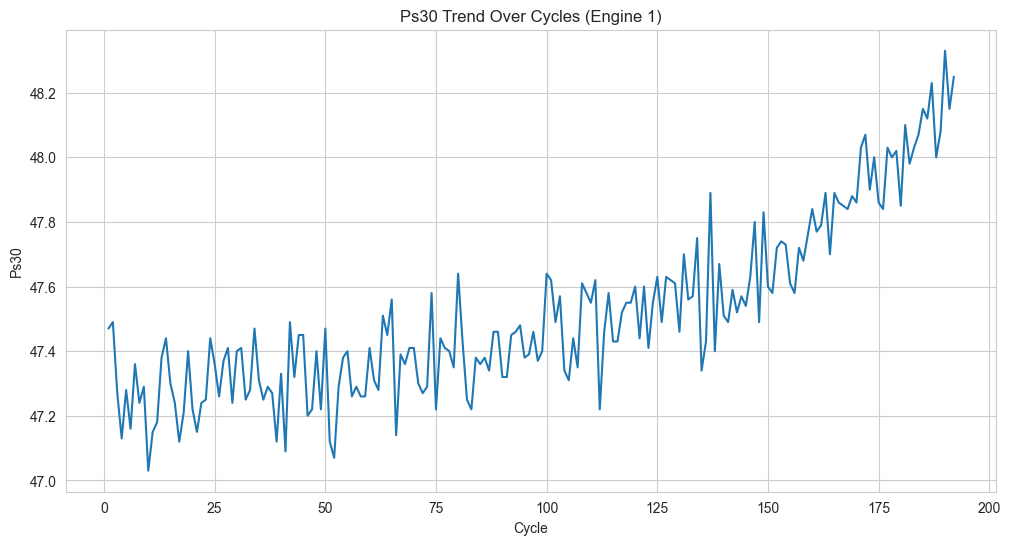

In [14]:
#Sensor Trend For a Engine

engine_example = 1 #can change if needed
engine_df = df[df['engine_id'] == engine_example]

plt.figure(figsize=(12,6))
plt.plot(engine_df['cycle'], engine_df['Ps30'])
plt.title("Ps30 Trend Over Cycles (Engine 1)")
plt.xlabel("Cycle")
plt.ylabel("Ps30")
plt.show()

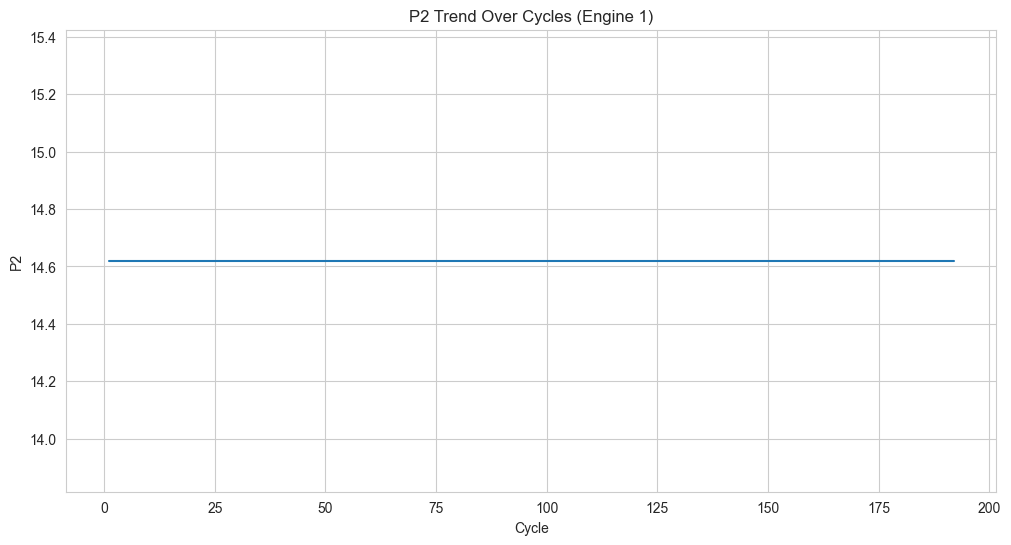

In [ ]:
#plotting a Constant / Dead Sensor
plt.figure(figsize=(12,6))
plt.plot(engine_df['cycle'], engine_df['P2'])
plt.title("P2 Trend Over Cycles (Engine 1)")
plt.xlabel("Cycle")
plt.ylabel("P2")
plt.show()
#No Effect On Cycle of engine

In [22]:
#Checking all Dead Sensors
constant_features = [col for col in df.columns if df[col].nunique() <= 1]

print(f'Dead/Constant Sensors identified: {constant_features}')
print(f'Number of Dead Sensors: {len(constant_features)} sensors.')

Dead/Constant Sensors identified: ['setting_3', 'T2', 'P2', 'epr', 'farB', 'Nf_dmd', 'PCNfR_dmd']
Number of Dead Sensors: 7 sensors.


In [24]:
#Dropping Dead/Constant sensors

df.drop(columns=constant_features, inplace=True)

print("\nDropped constant columns successfully.")
print(f"New Training Shape: {df.shape}")


Dropped constant columns successfully.
New Training Shape: (20631, 20)


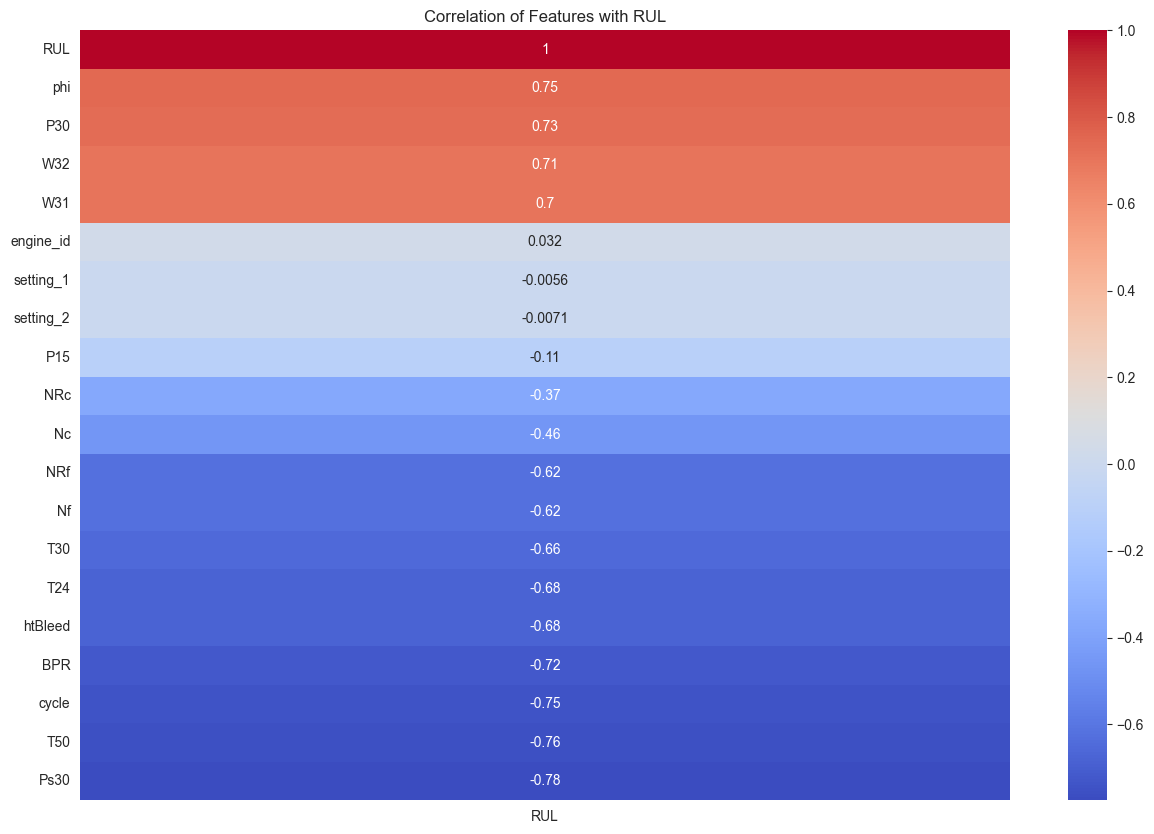

In [28]:
#Correlation/Heat Map after Removal of dead sensors

plt.figure(figsize=(15,10))

corr = df.corr()

sns.heatmap(corr[['RUL']].sort_values(by='RUL', ascending=False),
            annot=True,
            cmap='coolwarm')

plt.title("Correlation of Features with RUL")
plt.show()

#Insight: Sensors with high positive or negative correlation are the most important predictors